In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from operator import attrgetter

from my_modules.plot_and_stat_funcs import *

warnings.filterwarnings("ignore")

In [2]:
store = pd.read_csv('data/store_transformed.csv')

In [3]:
store.head()

,Store,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,EncodedDistance,EncodedCompetitionMonthsFromStart,EncodedPromo2WeeksFromStart,PromoInterval_,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec"
0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.321681,0.940159,0.000000,1.0,0.0,0.0,0.0
1,2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.837582,0.932949,0.955015,0.0,1.0,0.0,0.0
2,3,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.229804,0.925018,0.963845,0.0,1.0,0.0,0.0
3,4,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.783436,0.948810,0.000000,1.0,0.0,0.0,0.0
4,5,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.712706,0.997116,0.000000,1.0,0.0,0.0,0.0


In [4]:
train_encoded = pd.read_csv('data/train_encoded.csv')

In [5]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Store                              844392 non-null  int64  
 1   DayOfWeek                          844392 non-null  int64  
 2   Promo                              844392 non-null  int64  
 3   StateHoliday                       844392 non-null  int64  
 4   SchoolHoliday                      844392 non-null  int64  
 5   ordered_day                        844392 non-null  int64  
 6   ordered_week                       844392 non-null  int64  
 7   ordered_month                      844392 non-null  int64  
 8   Promo2                             844392 non-null  int64  
 9   StoreType_a                        844392 non-null  float64
 10  StoreType_b                        844392 non-null  float64
 11  StoreType_c                        8443

# Analysis of the new features

As the rows where Open equals 0 were removed and some features were encoded let's see how the new features look like.

The correlation matrix between all the features

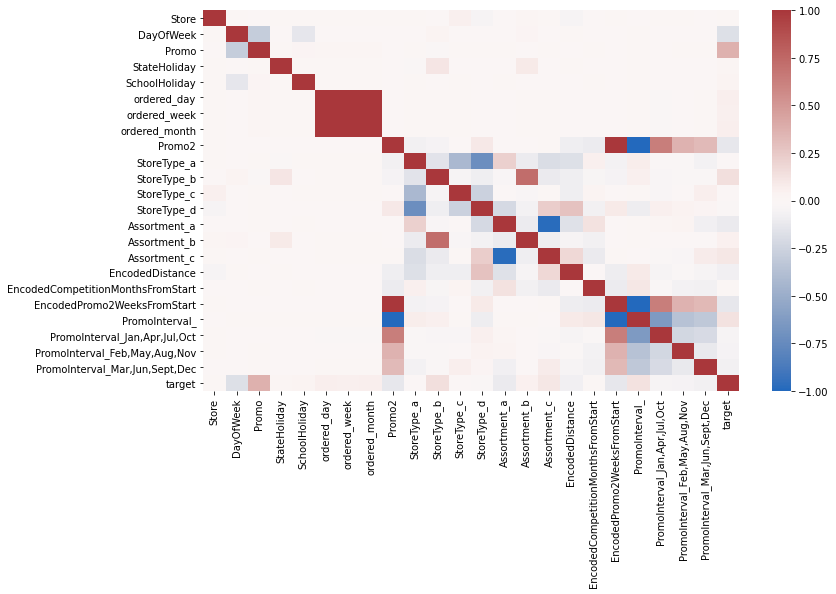

In [6]:
plt.figure(figsize=(12, 7))
sns.heatmap(train_encoded.corr(), cmap='vlag', vmin=-1, vmax=1)
plt.show()

As you can see there are some "clusters" of bright cells. But in all of them the correlation is between features used for encoding the same old feature. For example the big red square. It means that the correlation between the ordered number of day, week and month is high which is obviously. The big bright square at the right bottom corner and bright lines for **Promo2** mean that the correlation between "promo" features is high. Also if some features are sparse, the correlation between them is high. For example **StoreType_b** and **Assortment_b**.

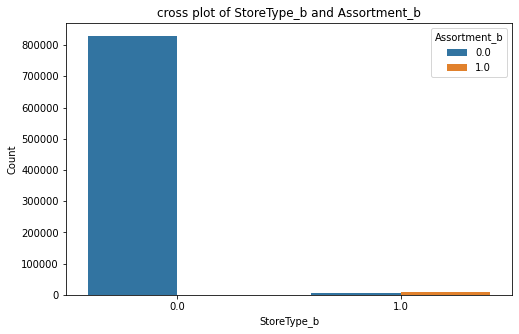

In [7]:
cross_bar_plot(train_encoded, col_x='StoreType_b', col_hue='Assortment_b', figsize=(8, 5))

Almost all the values of these features are (0, 0). So the correlation between them is high.  
There is a correlation between **DayOfWeek** and **Promo**.

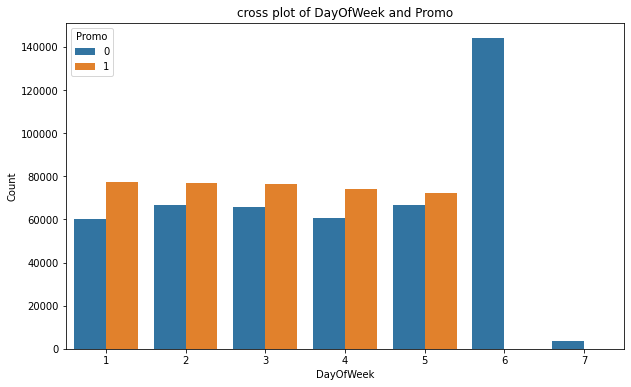

In [8]:
cross_bar_plot(train_encoded, 'DayOfWeek', 'Promo')

If **DayOfWeek** equal 6 or 7, **Promo** equals 0 in all cases. Otherwise **Promo** takes 0 or 1 with some probability similar for each **DayOfWeek**.

But the correlation between features and target is very low. It means that there is not linear dependency between them.

The number of unique days in the table

In [9]:
train_encoded.ordered_day.nunique()

942

So all the days in the old table are present here. But for some stores there are days that are absent in the table. For example the history of store with id = 1

In [10]:
train_encoded[train_encoded.Store == 1].target.size

781

In [11]:
all_days = train_encoded.ordered_day.unique()
all_days.sort()
all_days = pd.DataFrame({'ordered_day': all_days})

## Researching time series

Let's see the time series of means sales for different categories.  
I will show time series of mean monthly sales because some classes are imbalanced and the total sales can differ due to this.

### Total sales

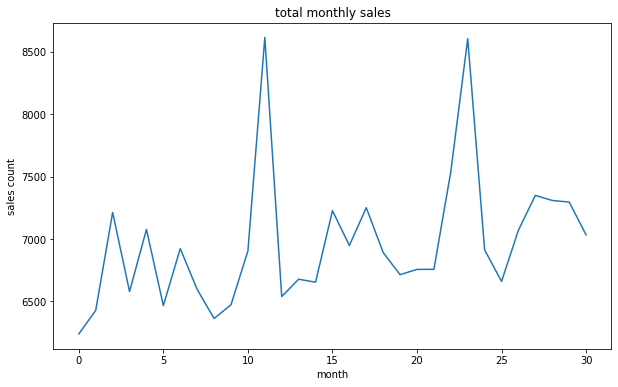

In [12]:
plot_time_series(train_encoded, time_range='month', agg_func='mean')

### Assortment

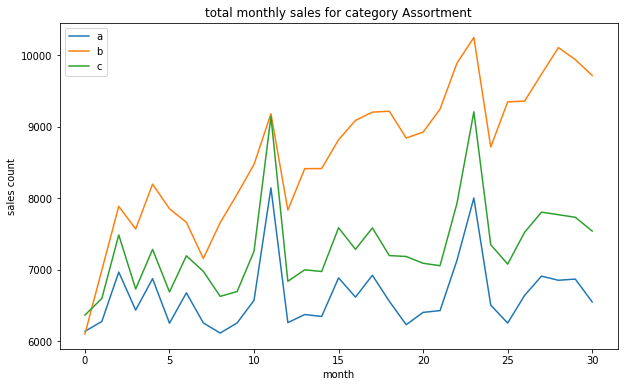

In [13]:
my_plot_time_series_of_encoded_cat(train_encoded, 'Assortment', time_range='month', agg_func='mean')

### StoreType

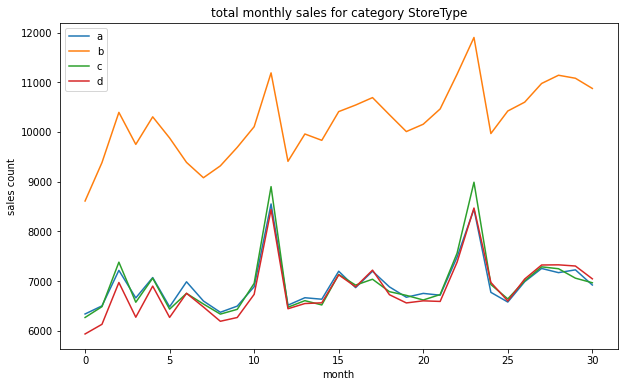

In [14]:
my_plot_time_series_of_encoded_cat(train_encoded, 'StoreType', time_range='month', agg_func='mean')

### PromoInterval

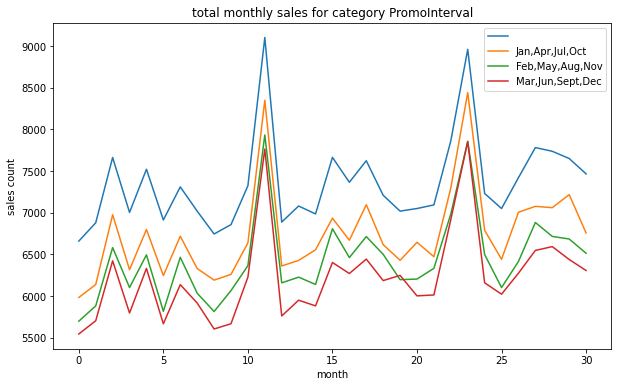

In [15]:
my_plot_time_series_of_encoded_cat(train_encoded, 'PromoInterval', time_range='month', agg_func='mean')

### Promo

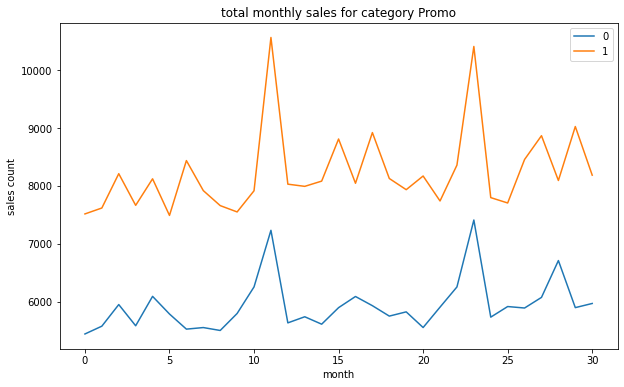

In [37]:
plot_time_series_of_cat(train_encoded, 'Promo', time_range='month', agg_func='mean')

### StateHoliday

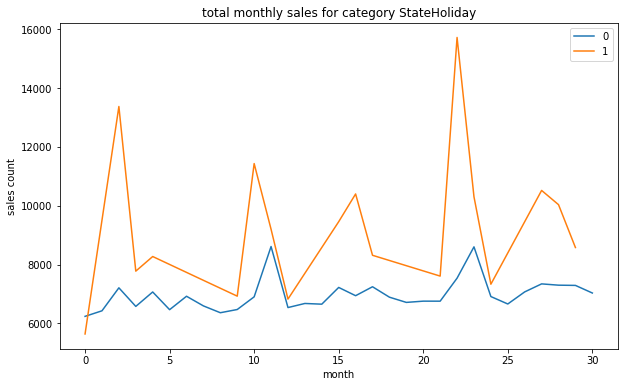

In [17]:
plot_time_series_of_cat(train_encoded, 'StateHoliday', time_range='month', agg_func='mean')

### SchoolHoliday

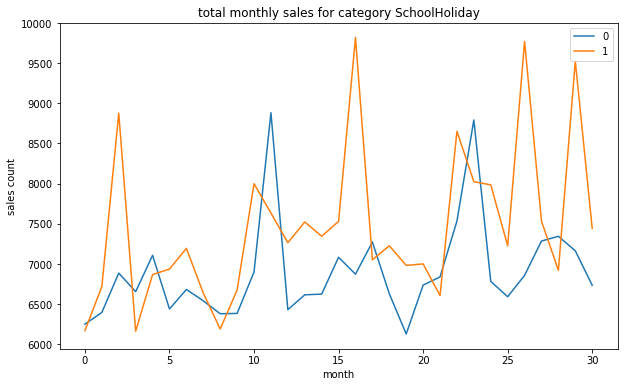

In [18]:
plot_time_series_of_cat(train_encoded, 'SchoolHoliday', time_range='month', agg_func='mean')

### DayOfWeek

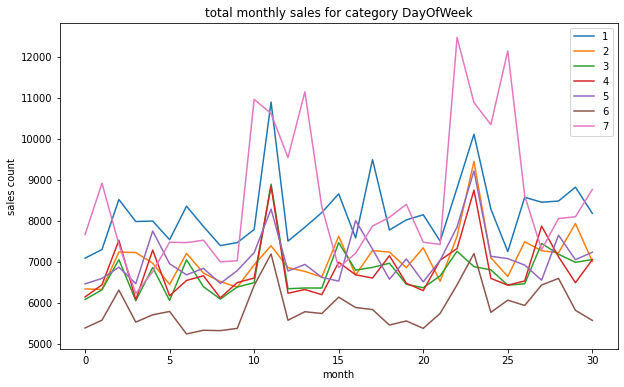

In [19]:
plot_time_series_of_cat(train_encoded, 'DayOfWeek', time_range='month', agg_func='mean')

### Promo2

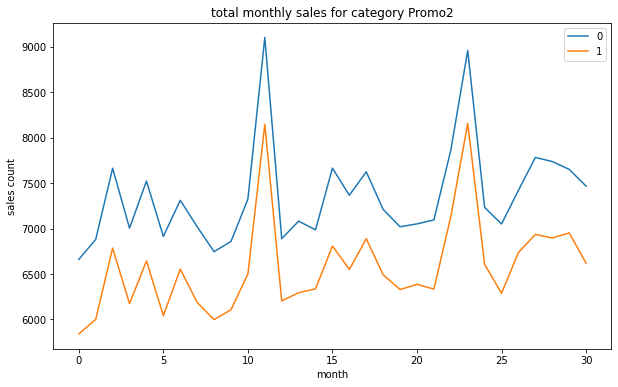

In [20]:
plot_time_series_of_cat(train_encoded, 'Promo2', time_range='month', agg_func='mean')

In [38]:
train_encoded.groupby('Promo2').target.mean()

Promo2
0    7350.557935
1    6558.386062
Name: target, dtype: float64

Here are some monthly sales of different stores

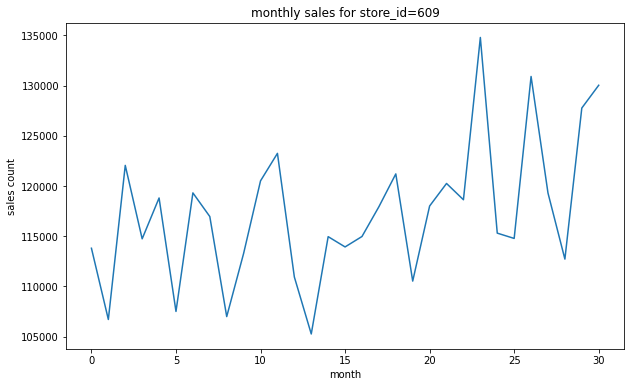

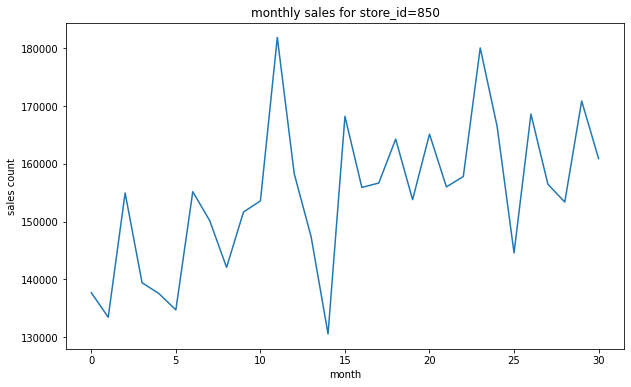

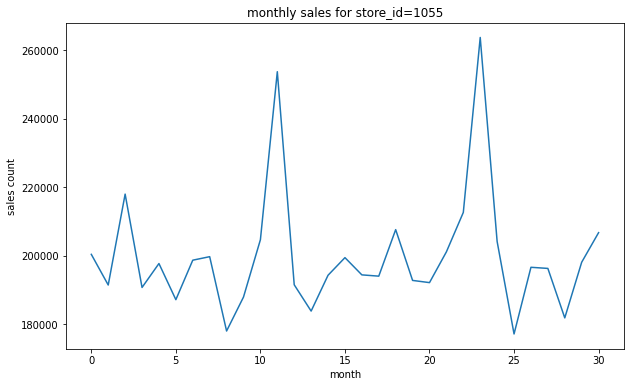

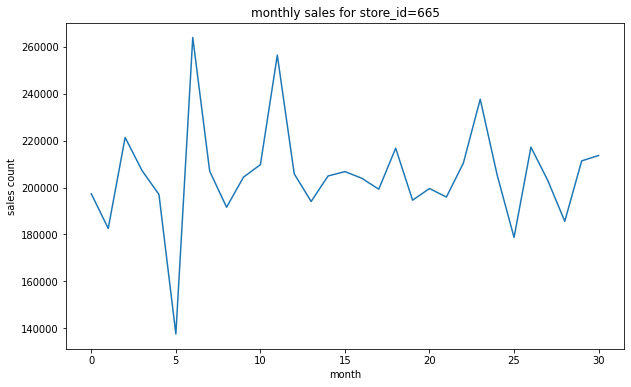

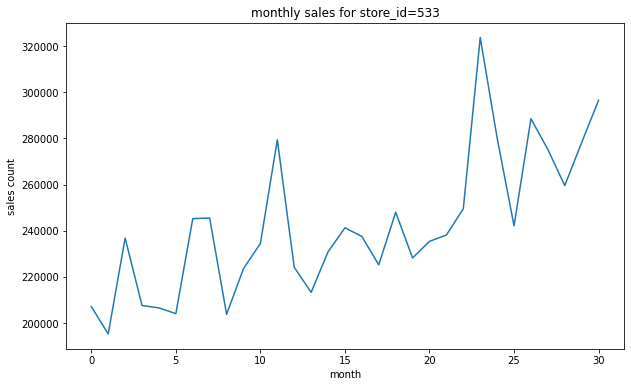

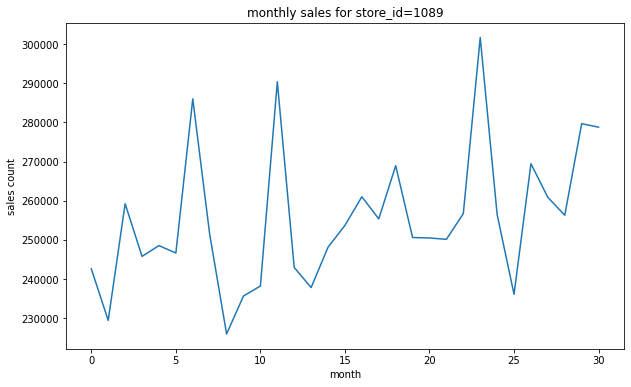

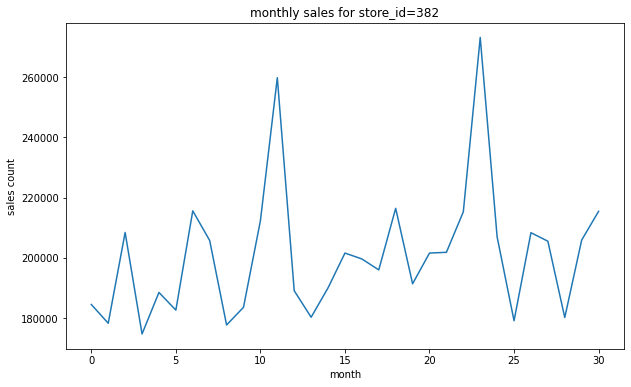

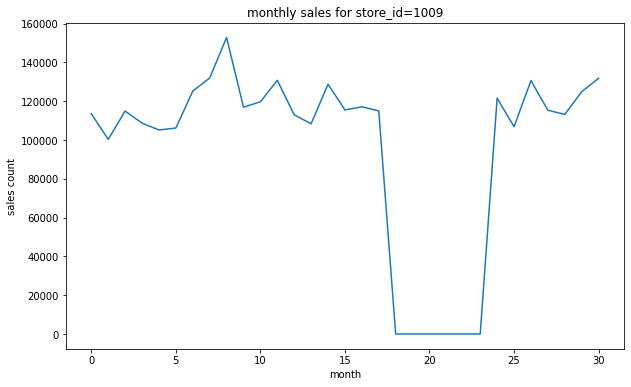

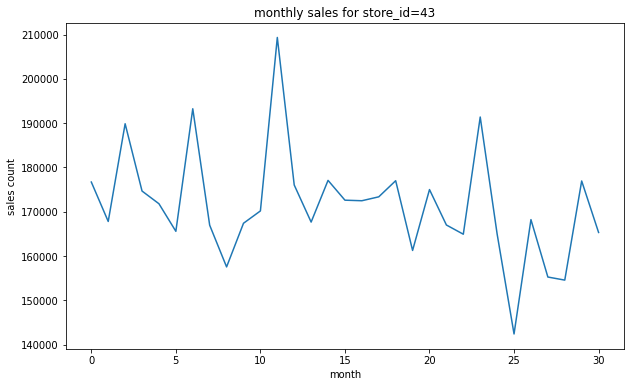

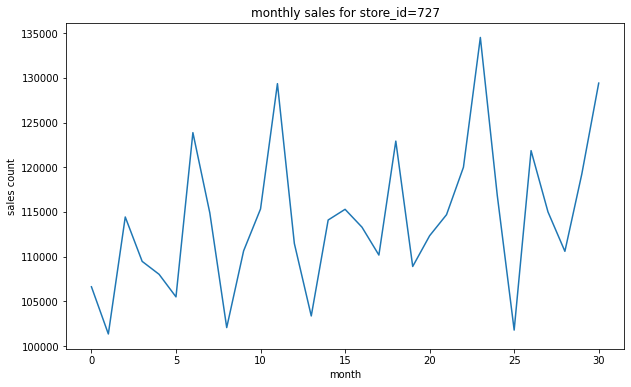

In [21]:
for store_id in store.Store.sample(10, random_state=450):
    plot_time_series(train_encoded, store_id, 'month')

One of them has a few months when the turnover equals 0. Some of them have increasing trend, some of them don't have any trend. Let's take a look at monthly sales of other stores.

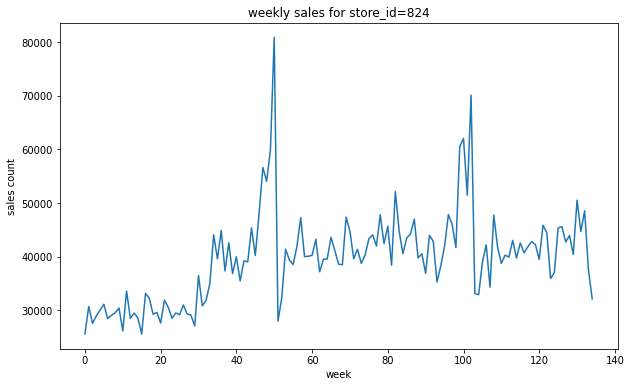

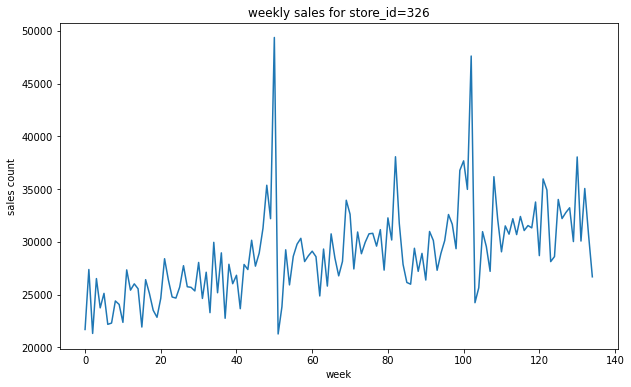

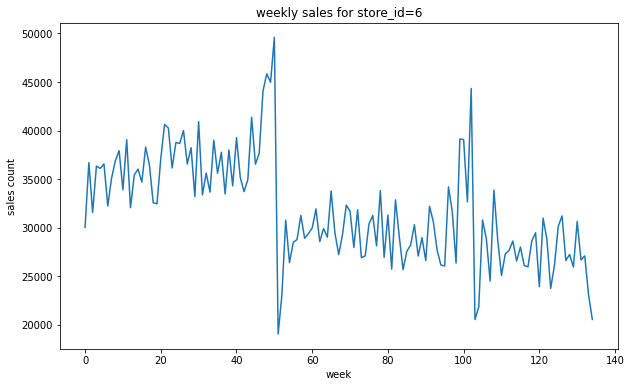

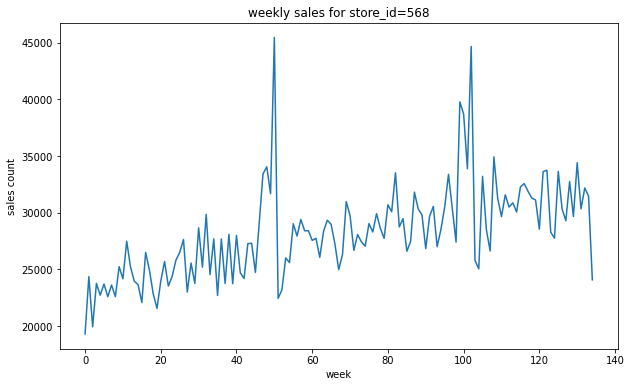

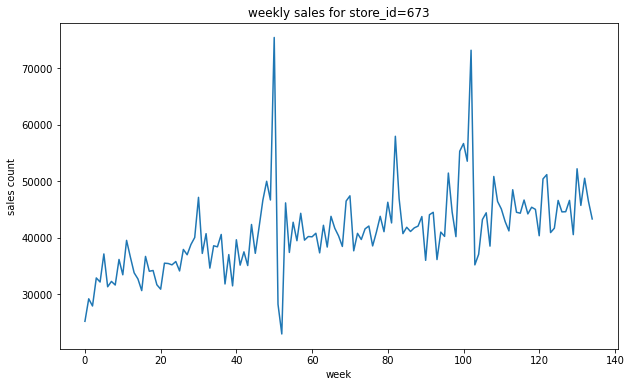

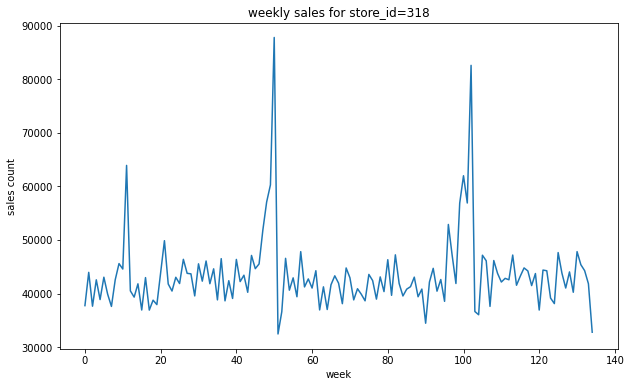

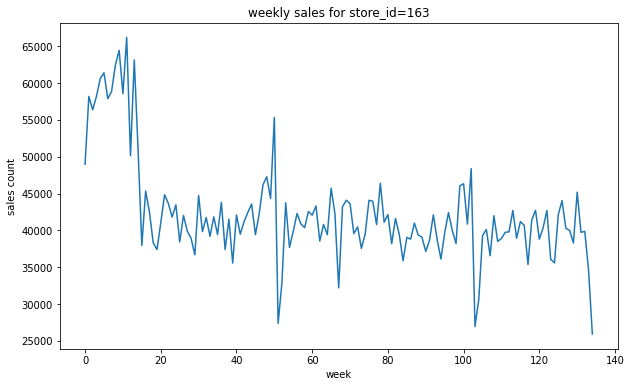

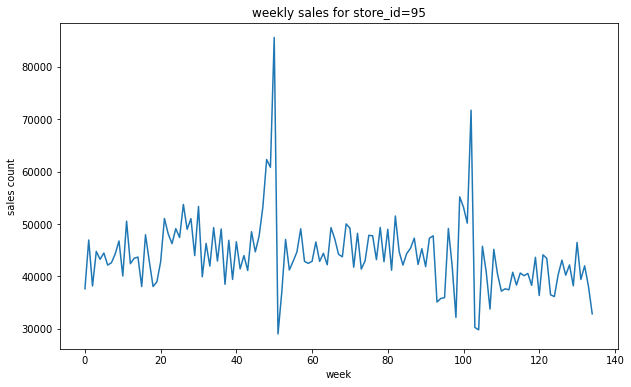

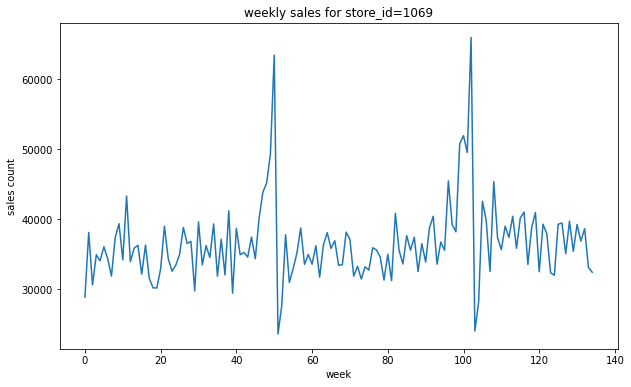

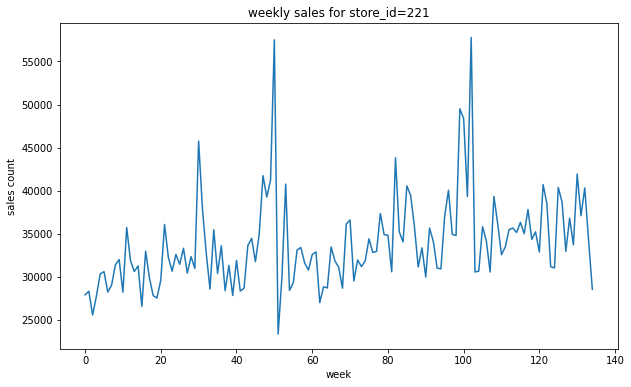

In [22]:
for store_id in store.Store.sample(10, random_state=298):
    plot_time_series(train_encoded, store_id, 'week')

The most of these graphics have pikes near by the december weeks. It can be explained by the greater demand before New Year. Some of them have increasing trend, some of them don't have any trend. So these series are common in having pikes near by New Year.

Let's see the total weekly and monthly sales

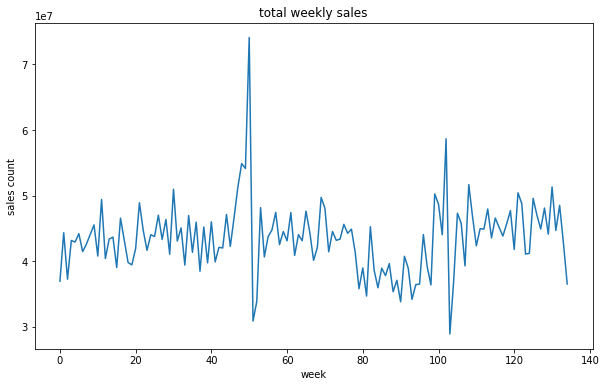

In [36]:
plot_time_series(train_encoded, time_range='week', agg_func='sum')

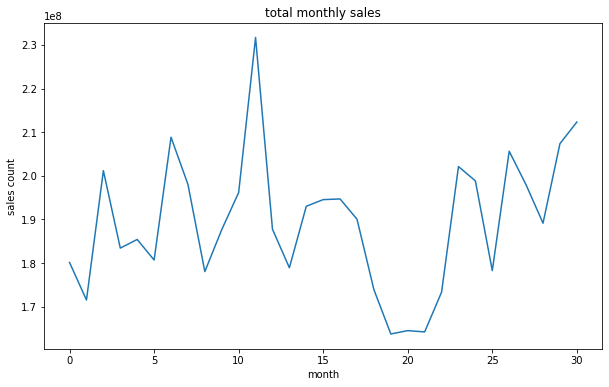

In [24]:
plot_time_series(train_encoded, time_range='month', agg_func='sum')

So there were 2 pikes about the New Year. But there is no some trend in these series. It means that trend formulas are not applicable for the total sales series.

Let's see the monthly sales depending on the Promo feature.

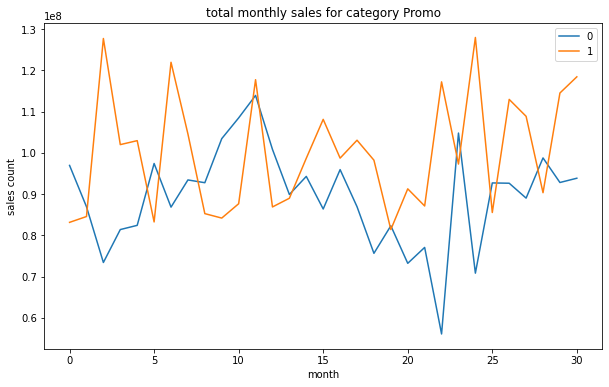

In [33]:
plot_time_series_of_cat(train_encoded, 'Promo', time_range='month', agg_func='sum')

In days when there is a promo the total sales are greater. But it can be explained by the biggest count of promo days. Let's see the mean sales.

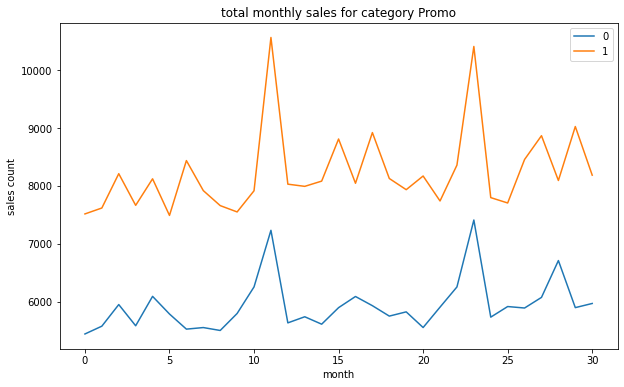

In [34]:
plot_time_series_of_cat(train_encoded, 'Promo', time_range='month', agg_func='mean')

The mean sales in promo days is higher than in usual ones. So the sales count depends on the fact if the promo is.

In [39]:
from category_encoders.target_encoder import TargetEncoder

In [41]:
te = TargetEncoder(cols=['Promo'])

In [42]:
te.fit_transform(train_encoded, train_encoded.target)

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,ordered_day,ordered_week,ordered_month,Promo2,StoreType_a,...,Assortment_b,Assortment_c,EncodedDistance,EncodedCompetitionMonthsFromStart,EncodedPromo2WeeksFromStart,PromoInterval_,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec",target
0,1,5,8228.281239,0,1,941,134,30,0,0.0,...,0.0,0.0,-0.321681,0.940159,0.0,1.0,0.0,0.0,0.0,5263
1,1,4,8228.281239,0,1,940,134,30,0,0.0,...,0.0,0.0,-0.321681,0.940159,0.0,1.0,0.0,0.0,0.0,5020
2,1,3,8228.281239,0,1,939,134,30,0,0.0,...,0.0,0.0,-0.321681,0.940159,0.0,1.0,0.0,0.0,0.0,4782
3,1,2,8228.281239,0,1,938,134,30,0,0.0,...,0.0,0.0,-0.321681,0.940159,0.0,1.0,0.0,0.0,0.0,5011
4,1,1,8228.281239,0,1,937,133,30,0,0.0,...,0.0,0.0,-0.321681,0.940159,0.0,1.0,0.0,0.0,0.0,6102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,8228.281239,0,0,6,0,0,0,1.0,...,0.0,0.0,-0.414223,0.946647,0.0,1.0,0.0,0.0,0.0,9291
844388,292,6,5929.407603,0,0,4,0,0,0,1.0,...,0.0,0.0,-0.414223,0.946647,0.0,1.0,0.0,0.0,0.0,2748
844389,292,5,5929.407603,0,1,3,0,0,0,1.0,...,0.0,0.0,-0.414223,0.946647,0.0,1.0,0.0,0.0,0.0,4202
844390,292,4,5929.407603,0,1,2,0,0,0,1.0,...,0.0,0.0,-0.414223,0.946647,0.0,1.0,0.0,0.0,0.0,4580


In [45]:
train = pd.read_csv('data/train.csv')

In [50]:
(train.groupby(['Store', 'Date']).Open.count() == 1).all()

True